In [1]:
import pandas as pd

train = pd.read_csv('./data/train.csv', index_col=0)
test = pd.read_csv('./data/test.csv', index_col=0)
submission = pd.read_csv('./data/sample_submission.csv', index_col=0)

train.head()

,rho,650_src,660_src,670_src,680_src,690_src,700_src,710_src,720_src,730_src,...,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst,hhb,hbo2,ca,na
id,,,,,,,,,,,,,,,,,,,,,
0,25,0.37950,0.42993,0.52076,0.57166,0.67818,0.75476,0.83580,0.93623,0.96333,...,NaN,0.000000e+00,NaN,1.067504e-18,5.998949e-18,4.378513e-17,5.59,4.32,8.92,4.29
1,10,0.00000,0.00000,0.01813,0.00000,0.00000,0.01974,0.00321,0.00000,0.00000,...,1.343132e-08,6.112685e-09,2.130547e-09,NaN,9.710091e-09,NaN,0.00,2.83,7.25,4.64
2,25,0.00000,0.03289,0.02416,0.03610,0.05843,0.09015,0.14944,0.18578,0.25584,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.329725e-18,NaN,10.64,3.00,8.40,5.16
3,10,0.27503,0.31281,0.32898,0.41041,0.46587,0.52769,0.64369,0.73562,0.79865,...,2.245998e-10,1.299511e-10,7.782625e-11,NaN,4.088921e-10,NaN,5.67,4.01,5.05,4.35
4,15,1.01521,1.00872,0.98930,0.98874,1.01773,1.01632,1.00009,0.98217,1.01564,...,1.457955e-13,8.769053e-14,NaN,1.330237e-13,NaN,NaN,11.97,4.41,10.78,2.42


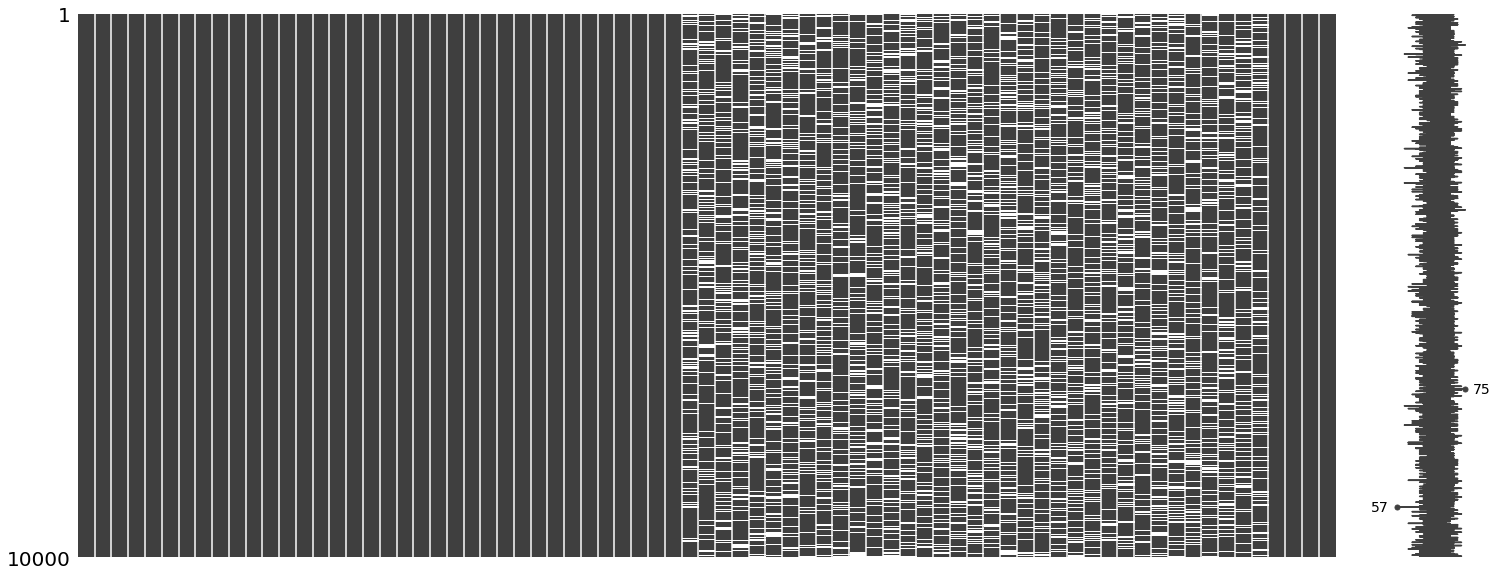

In [40]:
import missingno as msno

msno.matrix(train)

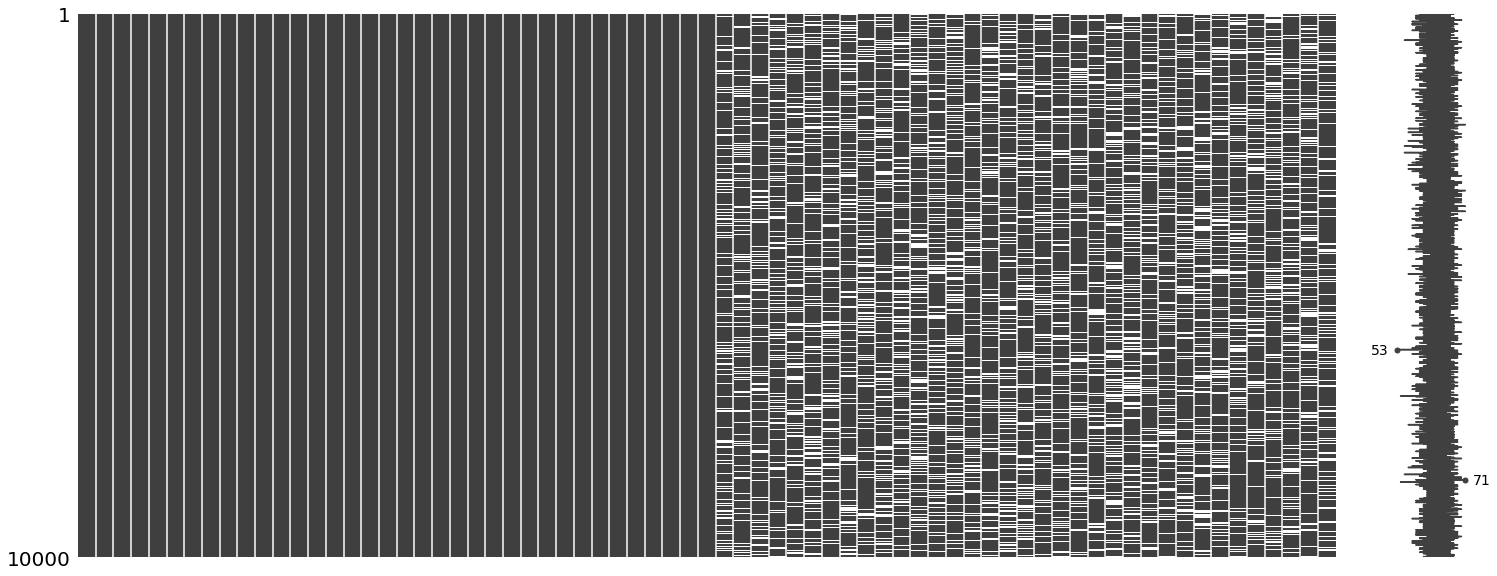

In [41]:
msno.matrix(test)

In [42]:
train.isnull().sum()[train.isnull().sum().values>0]

650_dst    1948
660_dst    1988
670_dst    1931
680_dst    1975
690_dst    2003
700_dst    1966
710_dst    1946
720_dst    2046
730_dst    2006
740_dst    1993
750_dst    2071
760_dst    2050
770_dst    1994
780_dst    1945
790_dst    2059
800_dst    2026
810_dst    1990
820_dst    2091
830_dst    1965
840_dst    2045
850_dst    2014
860_dst    2010
870_dst    2020
880_dst    1968
890_dst    2059
900_dst    1999
910_dst    2030
920_dst    2038
930_dst    1978
940_dst    2018
950_dst    2013
960_dst    2008
970_dst    2069
980_dst    1919
990_dst    1987
dtype: int64

In [43]:
test.isnull().sum()[test.isnull().sum().values>0]

650_dst    2026
660_dst    1960
670_dst    2015
680_dst    2006
690_dst    1985
700_dst    1948
710_dst    2043
720_dst    2014
730_dst    2038
740_dst    1999
750_dst    1965
760_dst    2000
770_dst    1956
780_dst    2020
790_dst    2030
800_dst    1961
810_dst    2034
820_dst    2042
830_dst    2058
840_dst    1947
850_dst    2005
860_dst    2008
870_dst    2063
880_dst    2080
890_dst    1996
900_dst    1976
910_dst    1919
920_dst    1981
930_dst    2000
940_dst    1999
950_dst    1949
960_dst    2020
970_dst    1976
980_dst    2011
990_dst    1970
dtype: int64

In [44]:
print(train.isnull().sum()[train.isnull().sum().values>0].index == test.isnull().sum()[test.isnull().sum().values>0].index)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]


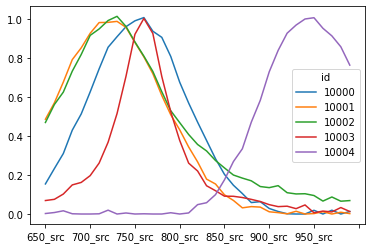

In [23]:
test.filter(regex='_src$',axis=1).head().T.plot()

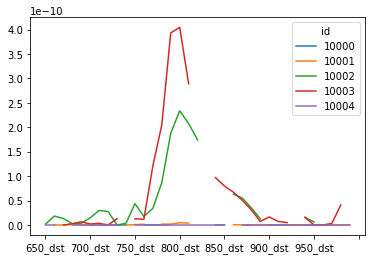

In [25]:
test.filter(regex='_dst$',axis=1).head().T.plot()

In [2]:
import numpy as np

train_dst = train.filter(regex='_dst$',axis=1)
test_dst = test.filter(regex='_dst$',axis=1)
test_dst.head(5)

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
id,,,,,,,,,,,,,,,,,,,,,
10000,0.000000e+00,NaN,7.028318e-15,NaN,NaN,2.191340e-14,2.204989e-14,0.000000e+00,0.000000e+00,1.306867e-15,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,NaN,7.320236e-14
10001,NaN,3.744801e-13,1.190392e-14,9.131521e-13,1.796724e-14,1.081485e-14,0.000000e+00,0.000000e+00,NaN,1.810959e-14,...,1.036013e-13,NaN,2.830975e-14,1.114337e-13,4.825731e-14,NaN,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
10002,1.732202e-12,1.827363e-11,1.332869e-11,2.641682e-12,3.498661e-12,1.466659e-11,2.981251e-11,2.764069e-11,0.000000e+00,3.423157e-12,...,NaN,NaN,NaN,NaN,1.569208e-11,6.242378e-12,NaN,1.219010e-11,NaN,NaN
10003,0.000000e+00,NaN,0.000000e+00,2.713471e-12,6.567726e-12,2.069053e-12,3.467277e-12,0.000000e+00,1.275280e-11,NaN,...,1.651177e-11,7.282747e-12,5.010879e-12,NaN,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,NaN
10004,0.000000e+00,4.030214e-17,NaN,2.500016e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.969590e-17,1.461565e-18,NaN,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [3]:
train_dst_l = train_dst.interpolate(methods='linear',axis=1)
test_dst_l = test_dst.interpolate(methods='linear',axis=1)

train_dst_l.fillna(0, inplace=True)
test_dst_l.fillna(0,inplace=True)
test_dst_l.head(5)

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
id,,,,,,,,,,,,,,,,,,,,,
10000,0.000000e+00,3.514159e-15,7.028318e-15,1.199001e-14,1.695171e-14,2.191340e-14,2.204989e-14,0.000000e+00,0.000000e+00,1.306867e-15,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,3.660118e-14,7.320236e-14
10001,0.000000e+00,3.744801e-13,1.190392e-14,9.131521e-13,1.796724e-14,1.081485e-14,0.000000e+00,0.000000e+00,9.054795e-15,1.810959e-14,...,1.036013e-13,6.595554e-14,2.830975e-14,1.114337e-13,4.825731e-14,3.554108e-14,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
10002,1.732202e-12,1.827363e-11,1.332869e-11,2.641682e-12,3.498661e-12,1.466659e-11,2.981251e-11,2.764069e-11,0.000000e+00,3.423157e-12,...,1.325728e-11,1.386598e-11,1.447468e-11,1.508338e-11,1.569208e-11,6.242378e-12,9.216241e-12,1.219010e-11,1.219010e-11,1.219010e-11
10003,0.000000e+00,0.000000e+00,0.000000e+00,2.713471e-12,6.567726e-12,2.069053e-12,3.467277e-12,0.000000e+00,1.275280e-11,1.266541e-11,...,1.651177e-11,7.282747e-12,5.010879e-12,1.036055e-11,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,4.106134e-11
10004,0.000000e+00,4.030214e-17,3.265115e-17,2.500016e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.969590e-17,1.461565e-18,5.603958e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


In [4]:
train_dst_v = train_dst.interpolate(methods='values',axis=1)
test_dst_v = test_dst.interpolate(methods='values',axis=1)

train_dst_v.fillna(0, inplace=True)
test_dst_v.fillna(0,inplace=True)
test_dst_v.head(5)

,650_dst,660_dst,670_dst,680_dst,690_dst,700_dst,710_dst,720_dst,730_dst,740_dst,...,900_dst,910_dst,920_dst,930_dst,940_dst,950_dst,960_dst,970_dst,980_dst,990_dst
id,,,,,,,,,,,,,,,,,,,,,
10000,0.000000e+00,3.514159e-15,7.028318e-15,1.199001e-14,1.695171e-14,2.191340e-14,2.204989e-14,0.000000e+00,0.000000e+00,1.306867e-15,...,0.000000e+00,0.000000e+00,1.432248e-14,0.000000e+00,0.000000e+00,6.332117e-15,1.429966e-14,0.000000e+00,3.660118e-14,7.320236e-14
10001,0.000000e+00,3.744801e-13,1.190392e-14,9.131521e-13,1.796724e-14,1.081485e-14,0.000000e+00,0.000000e+00,9.054795e-15,1.810959e-14,...,1.036013e-13,6.595554e-14,2.830975e-14,1.114337e-13,4.825731e-14,3.554108e-14,2.282485e-14,7.348414e-14,1.259055e-13,2.349874e-13
10002,1.732202e-12,1.827363e-11,1.332869e-11,2.641682e-12,3.498661e-12,1.466659e-11,2.981251e-11,2.764069e-11,0.000000e+00,3.423157e-12,...,1.325728e-11,1.386598e-11,1.447468e-11,1.508338e-11,1.569208e-11,6.242378e-12,9.216241e-12,1.219010e-11,1.219010e-11,1.219010e-11
10003,0.000000e+00,0.000000e+00,0.000000e+00,2.713471e-12,6.567726e-12,2.069053e-12,3.467277e-12,0.000000e+00,1.275280e-11,1.266541e-11,...,1.651177e-11,7.282747e-12,5.010879e-12,1.036055e-11,1.571023e-11,0.000000e+00,0.000000e+00,3.304247e-12,4.106134e-11,4.106134e-11
10004,0.000000e+00,4.030214e-17,3.265115e-17,2.500016e-17,0.000000e+00,0.000000e+00,0.000000e+00,3.969590e-17,1.461565e-18,5.603958e-18,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.732057e-17,4.110605e-17,0.000000e+00,0.000000e+00,1.910775e-16,2.215673e-15


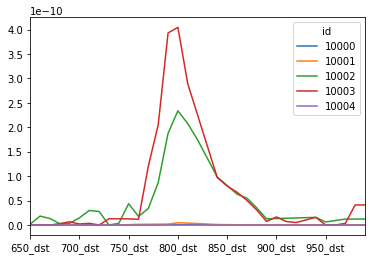

In [7]:
test_dst_l.head().T.plot()

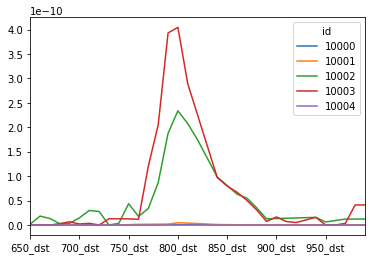

In [6]:
test_dst_v.head().T.plot()

In [50]:
train.update(train_dst_v)
test.update(test_dst_v)

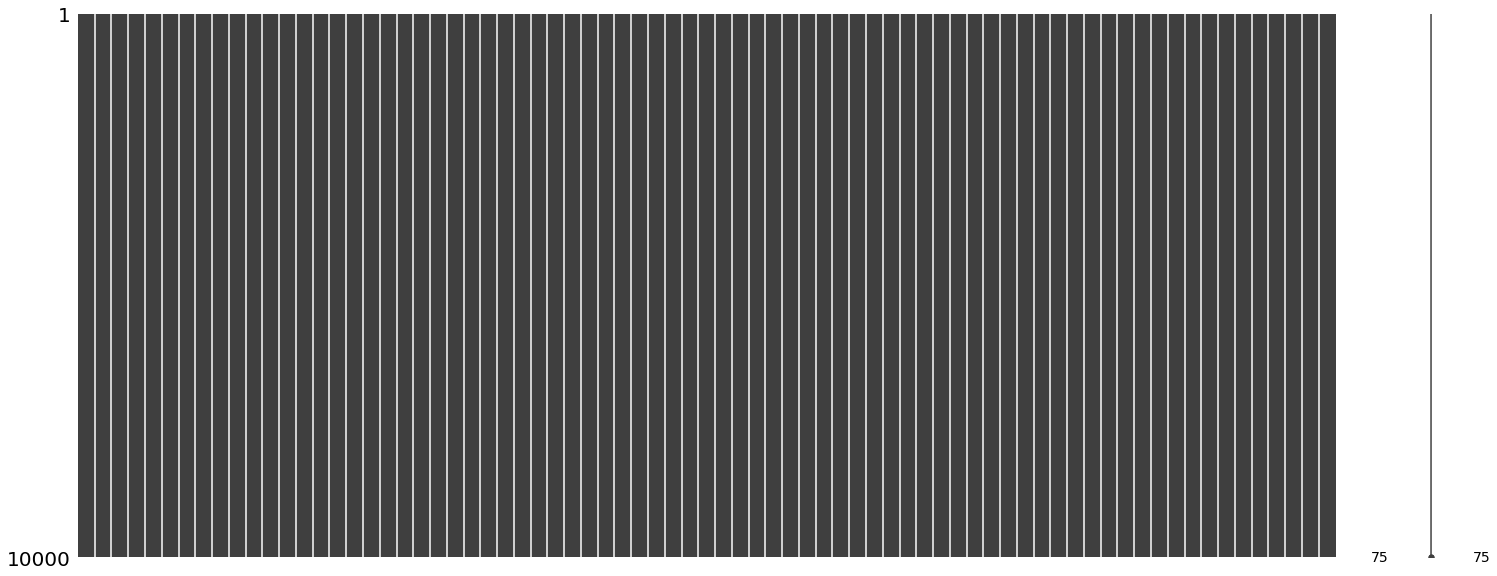

In [51]:
msno.matrix(train)

In [52]:
train.to_csv('./data/train_fixv.csv')
test.to_csv('./data/test_fixv.csv')